In [3]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import arepo_package as arepo_package
from LtU_get_property import get_particle_property_LTU

# Loading saved data:

In [9]:
with h5py.File("output/Constrained/rho_prof_p0_MMH.hdf5", "r") as f:
    keys= f.keys()
    print(keys[i] for i in range(len(keys)))
    # Bondi_AGN = f['Bondi_density_AGN'][:]
    # FF_AGN = f['FF_density_AGN'][:]
    # modFF_AGN = f['modFF_density_AGN'][:]
    
    # Bondi_noAGN = f['Bondi_density_noAGN'][:]
    # FF_noAGN = f['FF_density_noAGN'][:]
    # modFF_noAGN = f['modFF_density_noAGN'][:]

<generator object <genexpr> at 0x7f4677467920>


# Loading in data:

In [2]:
Filepath = '/project/torrey-group/jkho/LtU_accretion' 
Box = 'Constrained' # 'Zooms' # 'Low_mass_seeds' # 
SimPaths = [['Bondi_constrained_AGN_fewseeds_stellar','Bondi_constrained_noAGN_fewseeds_boost','Bondi_constrained_AGN_fewseeds_0.1stellar', 'Bondi_constrained_noAGN_0.1stellar',],
            ['FF_constrained_AGN_fewseeds_stellar','FF_constrained_noAGN_fewseeds','FF_constrained_AGN_fewseeds_0.1stellar','FF_constrained_noAGN_0.1stellar'],
            ['modFF_constrained_AGN_fewseeds_stellar','modFF_constrained_noAGN_fewseeds','modFF_constrained_AGN_fewseeds_0.1stellar','modFF_constrained_noAGN_0.1stellar']] 
# Zoom:  [['Bondi_zoom_boost','FF_zoom','modFF_zoom'],['Bondi_zoom_AGN','FF_zoom_AGN','modFF_zoom_AGN']] 
outputpath = 'output'


# path = '/project/torrey-group/jkho/LtU_accretion/Zooms/Bondi_zoom_AGN/output/snapdir_015'
# with h5py.File(path + "/snap_015.0.hdf5", "r") as f:
#     # BoxSize = f["Header"].attrs["BoxSize"]
#     # pos = np.array(f["PartType4"]["Coordinates"])
#     print(f['PartType1'].keys())

# HaloMasses,o=arepo_package.get_group_property('/project/torrey-group/jkho/LtU_accretion/Zooms/Bondi_zoom_AGN/output','GroupOffsetType',10)
# offset = arepo_package.get_subhalo_property('/project/torrey-group/jkho/LtU_accretion/Zooms/Bondi_zoom_AGN/output','SubhaloOffsetType',10)# [0][target]  

<KeysViewHDF5 ['Coordinates', 'ParticleIDs', 'Potential', 'Velocities']>


In [10]:
# basePath = '/project/torrey-group/jkho/LtU_accretion/Zooms/Bondi_zoom_AGN/output/'
desired_redshift = 5
h=0.776
Ptype = 5
# GasMass = get_particle_property_LTU(basePath,'Masses',p_type=Ptype, desired_redshift = desired_redshift)[0] * 1e10/h #
# for i in range(len(SimPaths)):

for sim in SimPaths[0]:
    basePath = f'{Filepath}/{Box}/{sim}/output/'
    BHMass = get_particle_property_LTU(basePath,'Masses',p_type=Ptype, desired_redshift = desired_redshift)[0] * 1e10/h #
    print(f'{sim} BH masses: {np.sort(BHMass)}')

Current snapshot:  20
'NoneType' object has no attribute 'get'
'NoneType' object has no attribute 'get'
'NoneType' object has no attribute 'get'
'NoneType' object has no attribute 'get'
'NoneType' object has no attribute 'get'
'NoneType' object has no attribute 'get'
'NoneType' object has no attribute 'get'
'NoneType' object has no attribute 'get'
Bondi_zoom_boost BH masses: [386597.94 386597.94 386598.1  386598.16 386598.16 386598.16 386598.25
 386598.28 386598.5  386598.72 386598.94 386599.1  386599.1  386599.2
 386600.1 ]
Current snapshot:  20
'NoneType' object has no attribute 'get'
'NoneType' object has no attribute 'get'
'NoneType' object has no attribute 'get'
'NoneType' object has no attribute 'get'
'NoneType' object has no attribute 'get'
FF_zoom BH masses: [386620.03 386625.03 386627.   386631.9  386636.34 386643.03 386651.84
 386653.2  386656.84 386670.9  386725.25 386750.62 386788.8  386850.53
 387398.9  387793.12 387891.78 388456.66 392281.53 420521.38 628371.1
 864774.6 ]

# Gas density:

In [2]:
rmin = 0.1    #the radius at which to start calculating the density
rmax = 50     #the radius at which to stop calculating the density
radial_samples = 50 
all_r = np.logspace(np.log10(rmin), np.log10(rmax), radial_samples)

with h5py.File("density_profiles.hdf5", "r") as f:
    Bondi_AGN = f['Bondi_density_AGN'][:]
    FF_AGN = f['FF_density_AGN'][:]
    modFF_AGN = f['modFF_density_AGN'][:]
    
    Bondi_noAGN = f['Bondi_density_noAGN'][:]
    FF_noAGN = f['FF_density_noAGN'][:]
    modFF_noAGN = f['modFF_density_noAGN'][:]
    # print(f.keys())


In [5]:
avg_Bondi_noAGN = np.median(Bondi_noAGN,axis=0)
avg_FF_noAGN = np.median(FF_noAGN,axis=0)
avg_modFF_noAGN = np.median(modFF_noAGN,axis=0)

avg_Bondi_AGN = np.median(Bondi_AGN,axis=0)
avg_FF_AGN = np.median(FF_AGN,axis=0)
avg_modFF_AGN = np.median(modFF_AGN,axis=0)

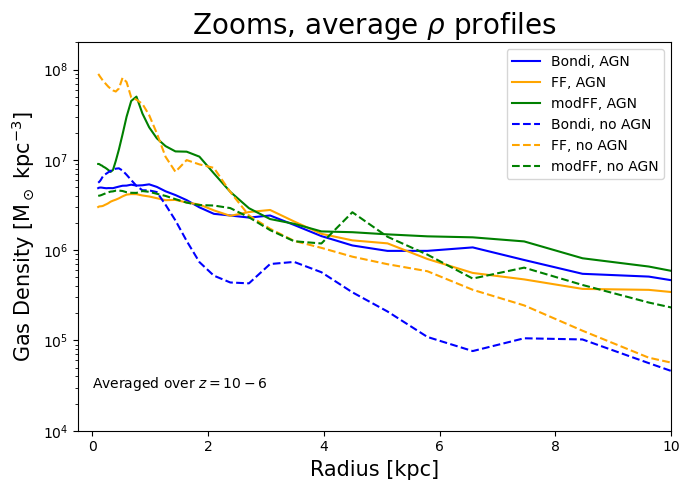

In [37]:
fig,axs = plt.subplots(1,1,figsize=(7,5))

axs.plot(all_r,avg_Bondi_AGN,label = 'Bondi, AGN',color = 'blue')
axs.plot(all_r,avg_FF_AGN,label = 'FF, AGN',color = 'orange')
axs.plot(all_r,avg_modFF_AGN,label = 'modFF, AGN',color = 'green')

axs.plot(all_r,avg_Bondi_noAGN,label = 'Bondi, no AGN',color = 'blue',ls = '--')
axs.plot(all_r,avg_FF_noAGN,label = 'FF, no AGN',color = 'orange',ls = '--')
axs.plot(all_r,avg_modFF_noAGN,label = 'modFF, no AGN',color = 'green',ls = '--')

axs.set_yscale('log')
axs.set_xlabel("Radius [kpc]",size=15)
axs.set_ylabel(r"Gas Density [M$_\odot$ kpc$^{-3}$]",size=15)
axs.set_xlim(-0.25,10)
axs.set_ylim(1e4,2e8)
axs.set_title(r'Zooms, average $\rho$ profiles',size=20)
axs.text(0,3e4,r'Averaged over $z=10-6$',fontsize=10)
axs.legend()
# fig.legend(loc = (0.725,0.65))
fig.tight_layout()
fig.savefig('Plots/Zoom_AGN_density_comparison.png')

# DM density check:

In [2]:
# with h5py.File("density_profiles_ptype1.hdf5", "r") as f:
with h5py.File("density_profiles_ptype1_MMH.hdf5", "r") as f:
    Bondi_AGN = f['Bondi_density_AGN'][:]
    FF_AGN = f['FF_density_AGN'][:]
    modFF_AGN = f['modFF_density_AGN'][:]
    
    Bondi_noAGN = f['Bondi_density_noAGN'][:]
    FF_noAGN = f['FF_density_noAGN'][:]
    modFF_noAGN = f['modFF_density_noAGN'][:]
    
    r = f['Radii'][:]
    # print(f.keys())

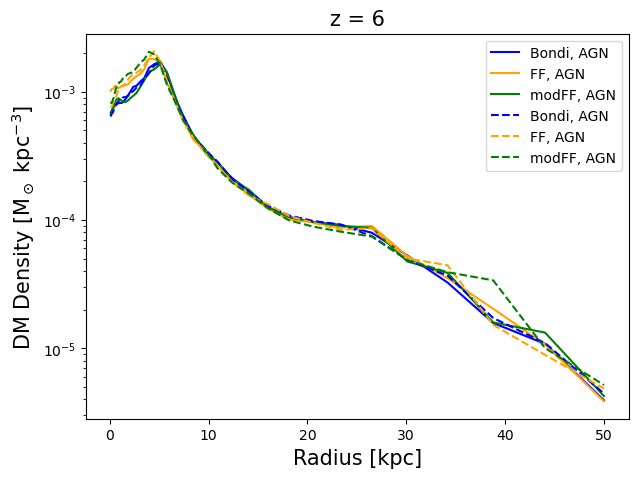

In [10]:
desired_redshifts=np.arange(10,5,-1)
i = 4

fig,axs = plt.subplots(1,1,figsize=(7,5))

axs.plot(r,Bondi_AGN[i],label = 'Bondi, AGN',color = 'blue')
axs.plot(r,FF_AGN[i],label = 'FF, AGN',color = 'orange')
axs.plot(r,modFF_AGN[i],label = 'modFF, AGN',color = 'green')

axs.plot(r,Bondi_noAGN[i],label = 'Bondi, AGN',color = 'blue',ls = '--')
axs.plot(r,FF_noAGN[i],label = 'FF, AGN',color = 'orange',ls = '--')
axs.plot(r,modFF_noAGN[i],label = 'modFF, AGN',color = 'green',ls = '--')

axs.set_yscale('log')
# axs.set_xlim(-0.25,10)
axs.set_xlabel("Radius [kpc]",size=15)
axs.set_ylabel(r"DM Density [M$_\odot$ kpc$^{-3}$]",size=15)
axs.set_title(f'z = {desired_redshifts[i]}',size=15)
axs.legend()
fig.savefig(f'Plots/Zoom_DM_rho_compatison_z{desired_redshifts[i]}_MMH.png')